In [15]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
#- Import data 
df = pd.read_csv('C:\\Users\\Aziz\\ars 2023\\trump-edges.csv')
df = pd.read_csv('C:\\Users\\Aziz\\ars 2023\\trump-nodes.csv')
print(len(df))

303


In [17]:
edges_df= pd.read_csv('C:\\Users\\Aziz\\ars 2023\\trump-edges.csv')

In [18]:
nodes_df = pd.read_csv('C:\\Users\\Aziz\\ars 2023\\trump-nodes.csv')

In [19]:
nodes_df.head()

,Id,Label
0,Paul Teller,Paul Teller
1,Donald J. Trump,Donald J. Trump
2,David S. Cordish,David S. Cordish
3,Reed S. Cordish,Reed S. Cordish
4,Cui Tiankai,Cui Tiankai


In [20]:
G= nx.Graph()
plt.show()

In [21]:
df.shape

(303, 2)

In [22]:
df.describe()

,Id,Label
count,303,303
unique,303,303
top,Paul Teller,Paul Teller
freq,1,1


In [23]:
df.isnull().sum() #Fortunately , there is no null values

Id       0
Label    0
dtype: int64

In [24]:
for _, node_data in nodes_df.iterrows():
    node_id = node_data['Id']
    node_attributes = node_data.drop('Id').to_dict()
    G.add_node(node_id, **node_attributes)

In [25]:
for _, edge_data in edges_df.iterrows():
    source = edge_data['Source']
    target = edge_data['Target']
    edge_attributes = edge_data.drop(['Source', 'Target']).to_dict()
    G.add_edge(source, target, **edge_attributes)

In [26]:
edges_df.columns

Index(['Source', 'Target', 'Weight', 'Relationship', 'Citation'], dtype='object')

In [27]:
entities = set(nodes_df['Id'])
relations = set(edges_df['Relationship'])

In [28]:
node_attributes = set(nodes_df.columns) - {'Id'}
edge_attributes = set(edges_df.columns) - {'Source', 'Target', 'Type'}

In [29]:
print(f"Nombre d'entités : {len(entities)}")
print(f"Nombre de relations : {len(relations)}")
print(f"Informations additionnelles des nœuds : {node_attributes}")
print(f"Informations additionnelles des liens : {edge_attributes}")
print(f"Nombre de nœuds dans le réseau : {len(G.nodes)}")
print(f"Nombre de liens dans le réseau : {len(G.edges)}")
print("Quelques nœuds du réseau : ", list(G.nodes)[:5])
print("Quelques liens du réseau : ", list(G.edges)[:5])

Nombre d'entités : 303
Nombre de relations : 243
Informations additionnelles des nœuds : {'Label'}
Informations additionnelles des liens : {'Weight', 'Relationship', 'Citation'}
Nombre de nœuds dans le réseau : 303
Nombre de liens dans le réseau : 366
Quelques nœuds du réseau :  ['Paul Teller', 'Donald J. Trump', 'David S. Cordish', 'Reed S. Cordish', 'Cui Tiankai']
Quelques liens du réseau :  [('Paul Teller', 'Donald J. Trump'), ('Donald J. Trump', 'Joe Hagin'), ('Donald J. Trump', 'Kellyanne Conway'), ('Donald J. Trump', 'Wilbur Ross'), ('Donald J. Trump', 'George E. Norcross Iii')]


In [30]:
#creer la connexion du graphe 

us_graph=nx.from_pandas_edgelist(df,source='Id',target='Label')

In [31]:
#Type de graphe 

type(us_graph)


networkx.classes.graph.Graph

In [32]:
#Les noeuds represente l'ordre du graphe 

us_graph.nodes()


NodeView(('Paul Teller', 'Donald J. Trump', 'David S. Cordish', 'Reed S. Cordish', 'Cui Tiankai', 'Jared Kushner', 'Hope Hicks', 'Andrew D. Koenig', 'Joseph Lai', 'Noel Francisco', 'Charles G. Koch', 'William I. Koch', 'Marc Short', 'David H. Koch', 'Nikki Haley', 'John Destefano', 'Chloe Murdoch', 'Ivanka Trump', 'Rupert Murdoch', 'Wendi Deng Murdoch', 'Scott Gast', 'Brad Parscale', 'Alexander Nix', 'Stephen Vaden', 'Sonny Perdue', 'Carlos Diaz-rosillo', 'Sheri A. Dillon', 'Peter Thiel', 'Keith Schiller', 'Serhiy Lyovochkin', 'Paul Manafort', 'Maryanne Trump Barry', 'Kevin Marino', 'Gary Cohn', 'Anthony Scaramucci', 'Kirill Dmitriev', 'Robert A. Iger', 'Alexander Gray', 'Rebekah Mercer', 'Robert Mercer', 'Sylvain Mirochnikoff', 'Stephen Bannon', 'Kellyanne Conway', 'Rudy Giuliani', 'Wilbur Ross', 'Ken Kurson', 'Alan Hammer', 'Charles Kushner', 'Mary T. Barra', 'Grace Murdoch', 'Sally Priebus', 'Reince Priebus', 'Scott Walker', 'Andrew Bremberg', 'Julian Assange', 'Roger J. Stone, Jr.'

In [33]:
len(us_graph.nodes())

303

In [34]:
us_graph.edges()

EdgeView([('Paul Teller', 'Paul Teller'), ('Donald J. Trump', 'Donald J. Trump'), ('David S. Cordish', 'David S. Cordish'), ('Reed S. Cordish', 'Reed S. Cordish'), ('Cui Tiankai', 'Cui Tiankai'), ('Jared Kushner', 'Jared Kushner'), ('Hope Hicks', 'Hope Hicks'), ('Andrew D. Koenig', 'Andrew D. Koenig'), ('Joseph Lai', 'Joseph Lai'), ('Noel Francisco', 'Noel Francisco'), ('Charles G. Koch', 'Charles G. Koch'), ('William I. Koch', 'William I. Koch'), ('Marc Short', 'Marc Short'), ('David H. Koch', 'David H. Koch'), ('Nikki Haley', 'Nikki Haley'), ('John Destefano', 'John Destefano'), ('Chloe Murdoch', 'Chloe Murdoch'), ('Ivanka Trump', 'Ivanka Trump'), ('Rupert Murdoch', 'Rupert Murdoch'), ('Wendi Deng Murdoch', 'Wendi Deng Murdoch'), ('Scott Gast', 'Scott Gast'), ('Brad Parscale', 'Brad Parscale'), ('Alexander Nix', 'Alexander Nix'), ('Stephen Vaden', 'Stephen Vaden'), ('Sonny Perdue', 'Sonny Perdue'), ('Carlos Diaz-rosillo', 'Carlos Diaz-rosillo'), ('Sheri A. Dillon', 'Sheri A. Dillon')

In [35]:

len(us_graph.edges())

303

In [36]:
# Visualization

import matplotlib.pyplot as plt 
%matplotlib inline 

In [37]:
import networkx as nx

us_graph = nx.Graph()

In [38]:
import networkx as nx

edges = [(0, 1), (1, 2), (2, 0)]
us_graph = nx.Graph(edges)


In [39]:
import pandas as pd

data = {'Weight': [1, 2, 3], 'Relationship': ['A', 'B', 'C']}
df = pd.DataFrame(data)


In [40]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Aziz\\ars 2023\\trump-edges.csv')

In [41]:
# Read our Edgelist

us_graph=nx.from_pandas_edgelist(df,source='Weight',target='Relationship')

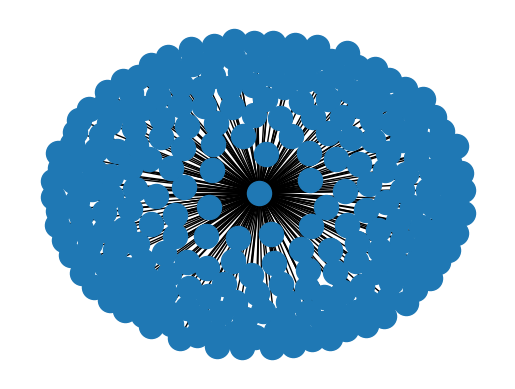

In [42]:
import matplotlib.pyplot as plt

# create a new figure and axis
fig, ax = plt.subplots()

# draw the graph on the axis
nx.draw(us_graph, ax=ax)

# display the figure
plt.show()

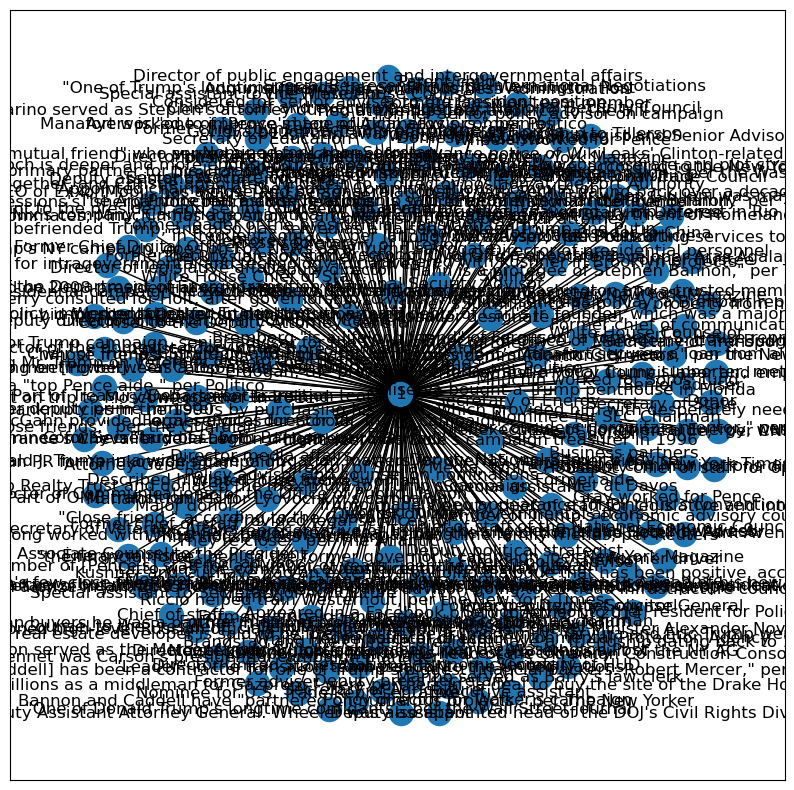

In [43]:
#visualisation des liens entres 

plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

In [44]:
# La densité : est le rapport entre les sommets --> permet de qualifier l'intensité de communication 
#et les échanges entre les membres ---> designe la force de transmission 

nx.density(us_graph)

0.00819672131147541

In [45]:
# Show node degree
nx.degree(us_graph)

DegreeView({1: 243, 'Special assistant': 1, 'Deputy chief of staff for operations': 1, 'White House Counselor': 1, 'Secretary of Commerce': 1, '"whose friendship with Mr. Trump dates to the president’s Atlantic City years," per the New York Times': 1, 'Senior adviser': 1, "Chair of Trump's Strategic and Policy forum": 1, 'Secretary of Veterans Affairs': 1, 'White House Domestic Policy Council labor and employment advisor': 1, 'Former driver': 1, 'A top touchstone outside the White House, according to the New York Times': 1, 'Assistant communications director': 1, 'White House political director': 1, 'Appointed chairman of the Federal Communications Commission': 1, '"One of Donald Trump\'s longtime confidants," per the Wall Street Journal': 1, '"Leader" in the transition team per CNN': 1, 'Director of policy implementation for Trump transition team': 1, 'Inauguration committee chairman': 1, 'Business partners': 1, "Trump made video appearance for Pinchuk's convention": 1, 'Part of OMB t

In [46]:
# Le plus colurt chemins entre 

nx.shortest_path(us_graph,"Former driver","Deputy chief of staff for operations")

['Former driver', 1, 'Deputy chief of staff for operations']

In [47]:
#Les composantes connexes : est l'existance maximle des chemins entre toute les paires de sommet , designe le terme d"adjacence 
# en définissant la domination au niveau de la trasmission i.e il esxite une forte tranmission entre tel membre et son adjacent 

nx.node_connected_component(us_graph,'Administrator of the Small Business Administration') 

{'"At least as far back as 2013 [Caddell] has been a contractor for one of Trump’s biggest financial backers: Robert Mercer," per The New Yorker',
 '"Close friend," according to the Guardian',
 '"Close friends," per the Guardian',
 '"Friend" per the New York Times',
 '"Hahn is a protégée of Stephen Bannon," per The New Yorker',
 '"Informal advisor to the Donald Trump campaign," per the Washington Post',
 '"Kushner and Cui have had an extensive ongoing dialogue that has been positive, according to a White House official," per Bloomberg',
 '"Leader" in the transition team per CNN',
 '"Longtime adviser," per Politico',
 '"Longtime aide," per CNN',
 '"Miller considers Horowitz a mentor," per Politico',
 '"Mr. Trump has 20-odd business partners, but none is closer to him than Mr. Ruffin," per the New York Times',
 '"One of Donald Trump\'s longtime confidants," per the Wall Street Journal',
 '"One of Trump\'s longtime friends," according to the Washington Post',
 '"Prince has a close relatio

In [48]:
# Most important Connection  
#cette fonction exprime la precedente en numerisant le degré de transmission entre les membres 

nx.eigenvector_centrality(us_graph)

{1: 0.7071135076403956,
 'Special assistant': 0.04536048965633113,
 'Deputy chief of staff for operations': 0.04536048965633113,
 'White House Counselor': 0.04536048965633113,
 'Secretary of Commerce': 0.04536048965633113,
 '"whose friendship with Mr. Trump dates to the president’s Atlantic City years," per the New York Times': 0.04536048965633113,
 'Senior adviser': 0.04536048965633113,
 "Chair of Trump's Strategic and Policy forum": 0.04536048965633113,
 'Secretary of Veterans Affairs': 0.04536048965633113,
 'White House Domestic Policy Council labor and employment advisor': 0.04536048965633113,
 'Former driver': 0.04536048965633113,
 'A top touchstone outside the White House, according to the New York Times': 0.04536048965633113,
 'Assistant communications director': 0.04536048965633113,
 'White House political director': 0.04536048965633113,
 'Appointed chairman of the Federal Communications Commission': 0.04536048965633113,
 '"One of Donald Trump\'s longtime confidants," per the W

In [49]:
#Le degré de centralité  : Normalisé par le nombre de laison possible 

nx.degree_centrality(us_graph)

{1: 1.0,
 'Special assistant': 0.00411522633744856,
 'Deputy chief of staff for operations': 0.00411522633744856,
 'White House Counselor': 0.00411522633744856,
 'Secretary of Commerce': 0.00411522633744856,
 '"whose friendship with Mr. Trump dates to the president’s Atlantic City years," per the New York Times': 0.00411522633744856,
 'Senior adviser': 0.00411522633744856,
 "Chair of Trump's Strategic and Policy forum": 0.00411522633744856,
 'Secretary of Veterans Affairs': 0.00411522633744856,
 'White House Domestic Policy Council labor and employment advisor': 0.00411522633744856,
 'Former driver': 0.00411522633744856,
 'A top touchstone outside the White House, according to the New York Times': 0.00411522633744856,
 'Assistant communications director': 0.00411522633744856,
 'White House political director': 0.00411522633744856,
 'Appointed chairman of the Federal Communications Commission': 0.00411522633744856,
 '"One of Donald Trump\'s longtime confidants," per the Wall Street Jour

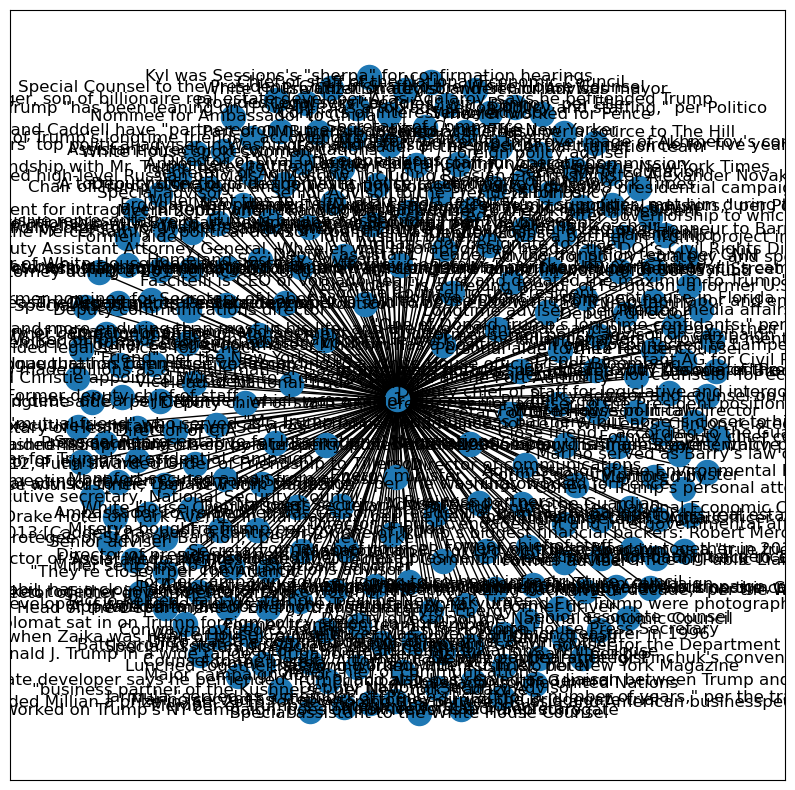

In [50]:
# La centralité intermmediare : permet de trouver les liens inter-communautés qui repond au principe de nouvelles pistes sont ouvertes 
# plus la connexion est importante plus on etablit un pont , 
#et si la connexion est faible on suppose que le lien est au sein de communauté 
#cette connexion est mesuré par la centralité d’intermédiare  

plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()


# on constate l'avantage du logiciel Gephi 

In [51]:
#Le degré de la centralité intermédiare 

nx.betweenness_centrality(us_graph)

{1: 0.9999999999999999,
 'Special assistant': 0.0,
 'Deputy chief of staff for operations': 0.0,
 'White House Counselor': 0.0,
 'Secretary of Commerce': 0.0,
 '"whose friendship with Mr. Trump dates to the president’s Atlantic City years," per the New York Times': 0.0,
 'Senior adviser': 0.0,
 "Chair of Trump's Strategic and Policy forum": 0.0,
 'Secretary of Veterans Affairs': 0.0,
 'White House Domestic Policy Council labor and employment advisor': 0.0,
 'Former driver': 0.0,
 'A top touchstone outside the White House, according to the New York Times': 0.0,
 'Assistant communications director': 0.0,
 'White House political director': 0.0,
 'Appointed chairman of the Federal Communications Commission': 0.0,
 '"One of Donald Trump\'s longtime confidants," per the Wall Street Journal': 0.0,
 '"Leader" in the transition team per CNN': 0.0,
 'Director of policy implementation for Trump transition team': 0.0,
 'Inauguration committee chairman': 0.0,
 'Business partners': 0.0,
 "Trump made

In [56]:
us_graph = nx.Graph()
for node in nodes_df:
    us_graph.add_node(str(node))
for edge in edges:
    us_graph.add_edge(str(edge[0]), str(edge[1]))


In [57]:
#cet algorithme est sous l'approche divisive qui définit la structure de communauté dans un cluster hierarchique 

from networkx.algorithms.community import greedy_modularity_communities
greedy_modularity_communities(us_graph)

[frozenset({'0', '1', '2'}), frozenset({'Id'}), frozenset({'Label'})]

In [58]:
# la coeficient de clustring est une mesure locale decrit le voisinnage entre  

# plus le coefficient est grand plus le voisinnage est proche d'une clique 

nx.clustering(us_graph,"Chief of staff and executive secretary, National Security Council","Deputy chief of staff for operations")

{}

# La deuxieme partie :
Label de propagation


In [59]:
nodes_list = list(us_graph.nodes)


In [60]:
print(us_graph.number_of_nodes())

5


In [61]:
len(us_graph.edges)

3

In [62]:
num_nodes = us_graph.number_of_nodes()
print(num_nodes)


5


In [63]:
group1 = nx.bfs_tree(us_graph,'0')

In [64]:
group2 = nx.bfs_tree(us_graph,'1')


In [65]:
group3 = nx.bfs_tree(us_graph,'2')


In [66]:
group4 = nx.bfs_tree(us_graph,'Id')


In [67]:
group5 = nx.bfs_tree(us_graph,'Label')


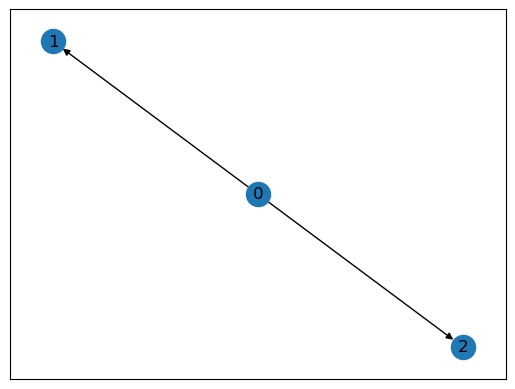

In [68]:
nx.draw_networkx(group1)

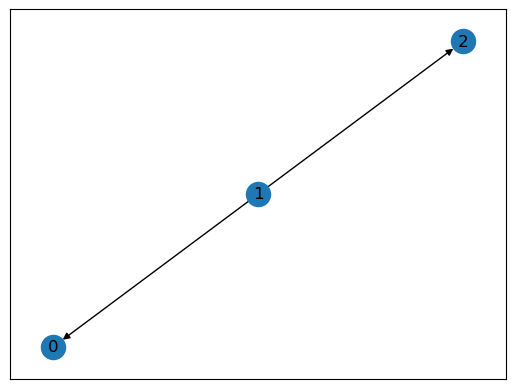

In [69]:
nx.draw_networkx(group2)

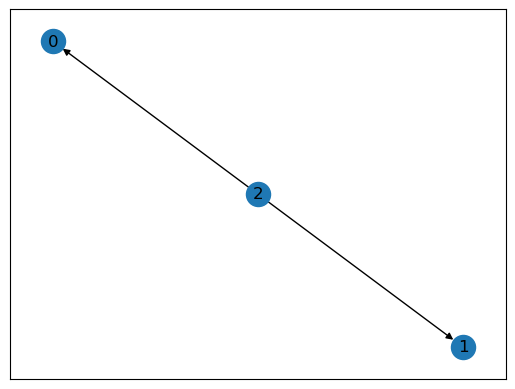

In [70]:
nx.draw_networkx(group3)

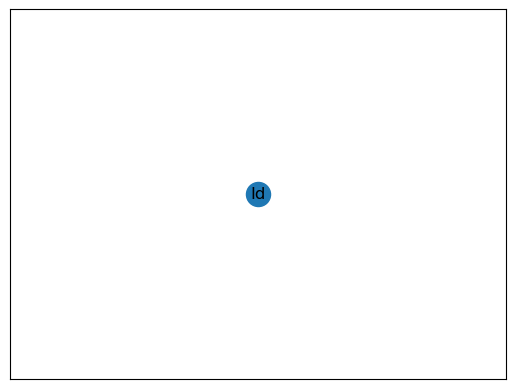

In [71]:
nx.draw_networkx(group4)

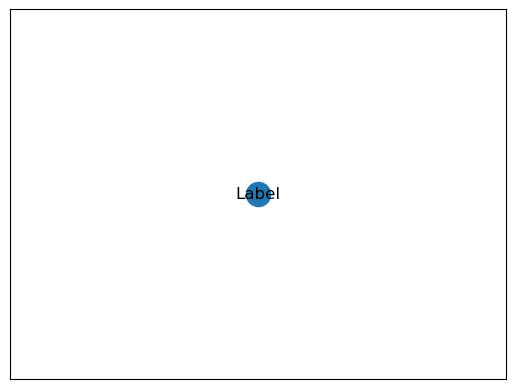

In [72]:
nx.draw_networkx(group5)

In [73]:
from itertools import combinations
import networkx as nx

In [74]:
def k_cliques(us_graph):
    # 2-cliques
    cliques = [{i, j} for i, j in nx.edges(us_graphe) if i != j]
    k = 2

    while cliques:
        # result
        yield k, cliques

        # merge k-cliques into (k+1)-cliques
        cliques_1 = set()
        for u, v in combinations(cliques, 2):
            w = u ^ v
            if len(w) == 2 and nx.has_edge(*w):
                cliques_1.add(tuple(u | w))

        # remove duplicates
        cliques = list(map(set, cliques_1))
        k += 1


def print_cliques(us_graph, size_k):
    for k, cliques in k_cliques(us_graph):
        if k == size_k:
            print('%d-cliques = %d, %s.' % (k, len(cliques), cliques))
            print_cliques(us_graph, size_k)

In [75]:
pip install python-louvain


Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install networkx-algorithms


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement networkx-algorithms (from versions: none)
ERROR: No matching distribution found for networkx-algorithms


In [77]:
import community
partition = community.best_partition(us_graph)


In [78]:
import community

partition = community.best_partition(us_graph)
print(partition)


{'Id': 0, 'Label': 1, '0': 2, '1': 2, '2': 2}


In [79]:
import community
partition = community.best_partition(us_graph)



In [80]:
!pip install angel --upgrade

In [81]:
import networkx as nx
from angel import Louvain, Angel

graph = nx.karate_club_graph()

# Use Louvain to detect initial communities
louvain = Louvain(graph)
louvain.execute()
communities = louvain.get_communities()

# Use Angel for further refinement
angel = Angel(graph, communities=communities)
angel.execute()
refined_communities = angel.get_communities()



ImportError: cannot import name 'Louvain' from 'angel' (C:\Users\Aziz\anaconda3\lib\site-packages\angel\__init__.py)